<a href="https://colab.research.google.com/github/Jayand97/DSA-Assignment/blob/main/Zscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

In [4]:
data = pd.read_csv("/content/beer-servings.csv",index_col='Unnamed: 0')
data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,NaN,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [6]:
data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,185.000000,185.000000,187.000000,192.000000
mean,105.124324,83.221622,50.165775,4.741667
std,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,60.000000,9.000000,4.250000
75%,185.000000,132.000000,60.500000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [7]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

array([[<Axes: title={'center': 'beer_servings'}>,
        <Axes: title={'center': 'spirit_servings'}>],
       [<Axes: title={'center': 'wine_servings'}>,
        <Axes: title={'center': 'total_litres_of_pure_alcohol'}>]],
      dtype=object)

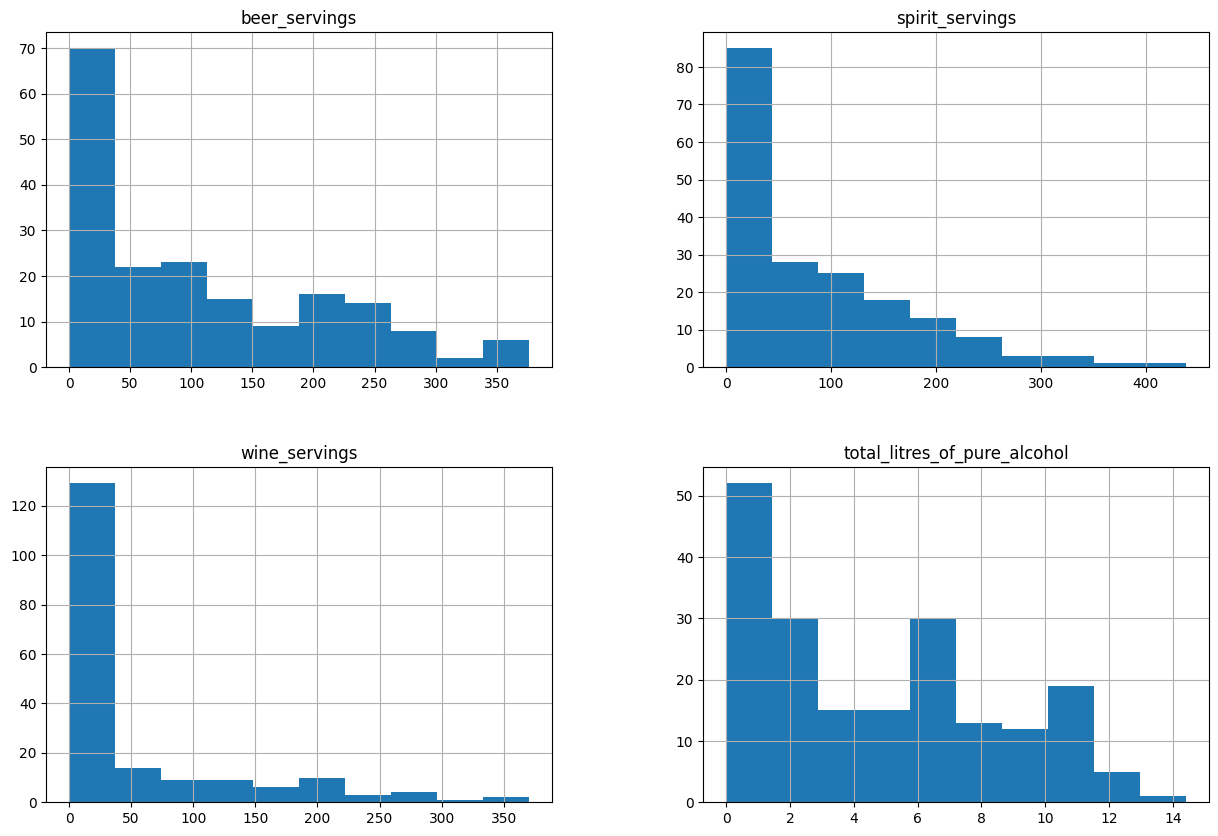

In [8]:
freqgraph = data.select_dtypes(include='float64')
freqgraph.hist(figsize=(15,10))

In [9]:
data['beer_servings']= data['beer_servings'].fillna(data['beer_servings'].median())
data['spirit_servings']= data['spirit_servings'].fillna(data['spirit_servings'].median())
data['wine_servings']= data['wine_servings'].fillna(data['wine_servings'].median())
data['total_litres_of_pure_alcohol']= data['total_litres_of_pure_alcohol'].fillna(data['total_litres_of_pure_alcohol'].median())


In [10]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [11]:
num_cols=['beer_servings',	'spirit_servings',	'wine_servings',	'total_litres_of_pure_alcohol']


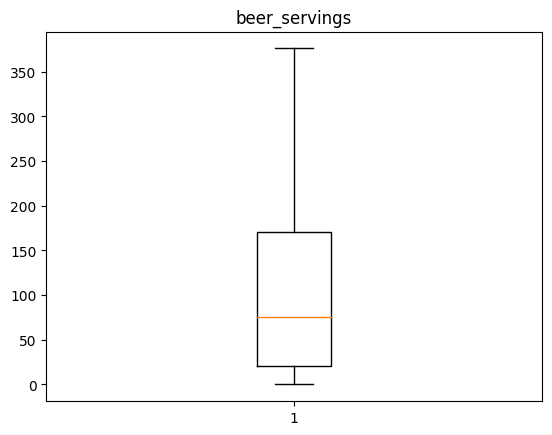

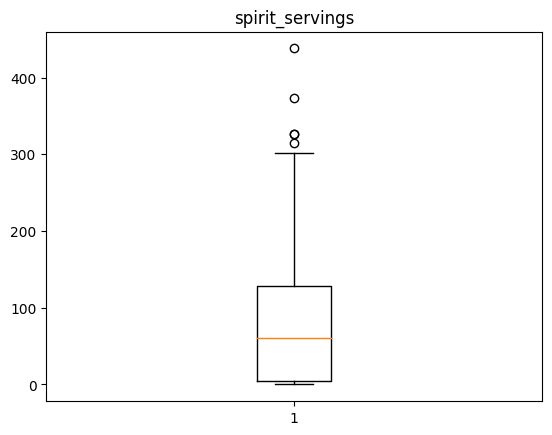

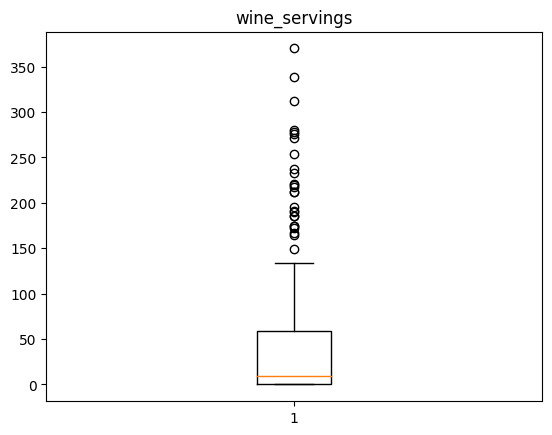

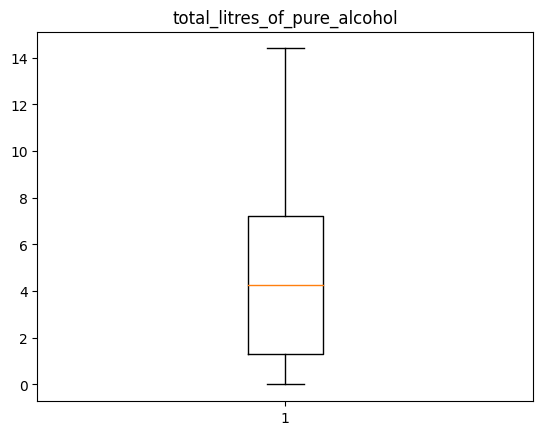

In [12]:
for i in num_cols:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

Beer Servings Zscore


In [19]:
z_scores = stats.zscore(data['beer_servings'])
z_scores

0     -1.056880
1     -0.151713
2     -0.802619
3      1.434871
4      1.150100
         ...   
188   -0.283928
189    0.072036
190   -0.995857
191   -0.731427
192   -0.405973
Name: beer_servings, Length: 193, dtype: float64

In [14]:
df_zscore = data[(z_scores > -3) & (z_scores < 3)]

Text(0.5, 1.0, 'Z Score Plot Before Removing Outlier')

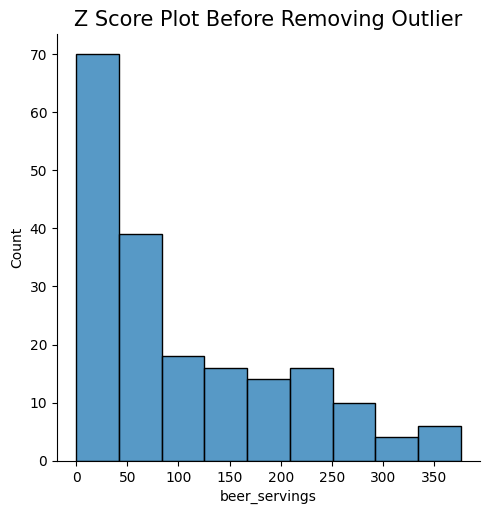

In [15]:

sns.displot(data['beer_servings'])
plt.title('Z Score Plot Before Removing Outlier',fontsize=15)

Text(0.5, 1.0, 'Z Score Plot After Removing Outlier')

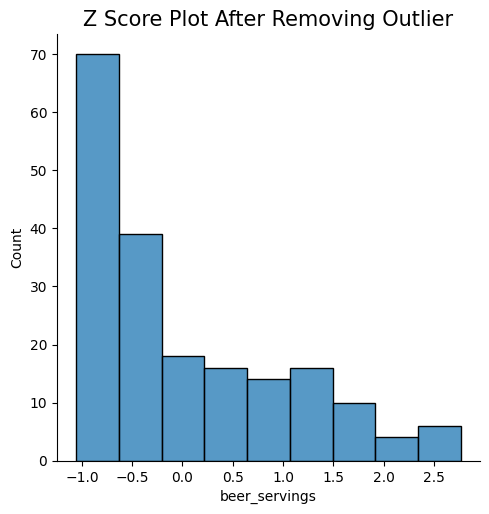

In [25]:

sns.displot(stats.zscore(data['beer_servings']))
plt.title('Z Score Plot After Removing Outlier',fontsize=15)

In [17]:
df_zscore.shape

(193, 6)

In [20]:
z_scores1 = stats.zscore(data['spirit_servings'])
z_scores1

0     -0.943742
1      0.570668
2     -0.943742
3      0.639505
4     -0.289792
         ...   
188    0.203538
189   -0.920796
190   -0.943742
191   -0.725759
192   -0.737231
Name: spirit_servings, Length: 193, dtype: float64

In [21]:
df_zscore1 = data[(z_scores1 > -3) & (z_scores1 < 3)]

Text(0.5, 1.0, 'Z Score Plot Before Removing Outlier')

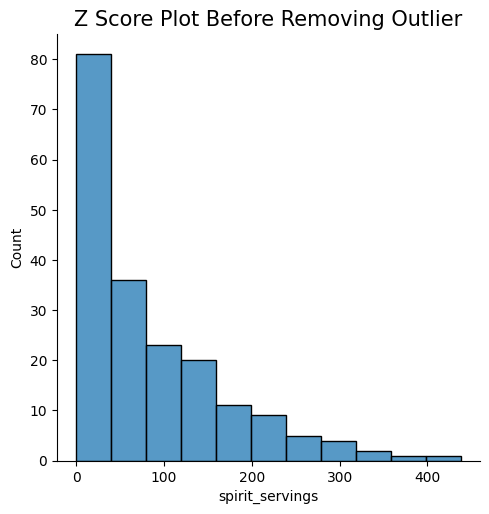

In [23]:
sns.displot(data['spirit_servings'])
plt.title('Z Score Plot Before Removing Outlier',fontsize=15)

Text(0.5, 1.0, 'Z Score Plot After Removing Outlier')

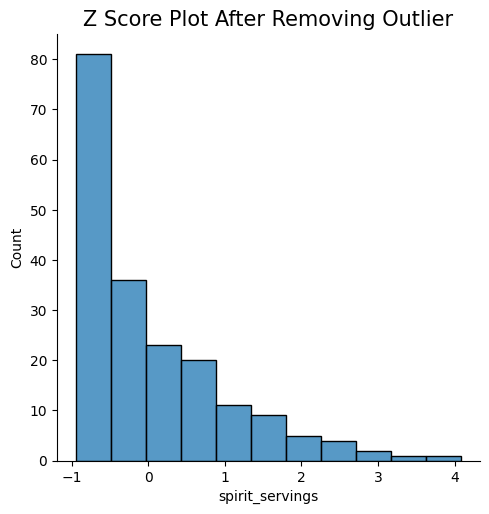

In [26]:
sns.displot(stats.zscore(data['spirit_servings']))
plt.title('Z Score Plot After Removing Outlier',fontsize=15)